## Importing Necessary Libraries

In [ ]:
import os
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
import matplotlib.pyplot as plt
from scipy.stats import shapiro


## Downloading the data from google drive link. Dataset was uploaded in a google drive link and we can directly download the data from the google drive into the google colab.

In [ ]:
!gdown https://drive.google.com/uc?id=1vDyA3vO4lgrnDoW5A6YBl_9lyynKRd6o

Downloading...
From: https://drive.google.com/uc?id=1vDyA3vO4lgrnDoW5A6YBl_9lyynKRd6o
To: /content/automobile.zip
100% 8.52k/8.52k [00:00<00:00, 16.1MB/s]


## Create a new directory to store the file contents of a zip file

In [ ]:
os.mkdir('automobiles')

## Unzip the files inside a zip file and extract them under automobiles directory

In [ ]:
archive = ZipFile('automobile.zip')
archive.extractall('automobiles')

## Created a function that extract the data given the filename where the data is present.

In [ ]:
def extract_data(file_name):
  with open(file_name, 'r') as file:
    reader = file.readlines()
    data = [item.strip('\n').split(',') for item in reader]
    return data

## Created a function to extract the column names given the filename where the column names are present.

In [ ]:
def extract_columns(file_name):
  with open(file_name, 'r') as file:
    reader = file.readlines()
    start = [item for item in reader if item.endswith('Attribute Range:\n')]
    start_index = reader.index(start[0])
    end = [item for item in reader if 'Missing Attribute Values' in item]
    end_index = reader.index(end[0])
    cols_info = reader[start_index + 2: end_index - 1]
    cols_info = [col.split(':')[0] for col in cols_info]
    cols_info = [col for col in cols_info if '.' in col]
    cols_info = [col.split('.')[1] for col in cols_info]
    cols_info = [col.strip() for col in cols_info]
    return cols_info

## Names of the files containing column names and the data respectively.

In [ ]:
col_file_name = './automobiles/imports-85.names'
data_file_name = './automobiles/imports-85.data'

## Extracting the data and column names from these respective files by calling the functions that we defined above.

In [ ]:
data = extract_data(data_file_name)
cols = extract_columns(col_file_name)

## Representing the data in a pandas dataframe

In [ ]:
df = pd.DataFrame(data = data, columns = cols)
print(df.shape)
df.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


### Checking the information of the data inside a dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    object
 1   normalized-losses  205 non-null    object
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       205 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-location    205 non-null    object
 9   wheel-base         205 non-null    object
 10  length             205 non-null    object
 11  width              205 non-null    object
 12  height             205 non-null    object
 13  curb-weight        205 non-null    object
 14  engine-type        205 non-null    object
 15  num-of-cylinders   205 non-null    object
 16  engine-size        205 non-null    object
 1

<b><li>Here all of the features are categorized as object datatypes.</li></b>
<b><li>So, a careful observation needs to be done to identify numeric features and categorical features.</li></b>
<b><li>We checked the range of values for each of the feature provided in the data description file to know the appropriate data types for each of the features and converting them accordingly.</li></b>

# Converting To Appropriate Data Types

## numeric features:
### int:
 - price,
 - highway-mpg,
 - city-mpg,
 - peak-rpm,
 - engine-size,
 - curb-weight,
 - normalized-losses,
 - symboling

### float:
- compression-ratio,
- stroke,
- bore,
- height,
- width,
- length,
- wheel-base,

### categorical features:
- fuel-system,
- num-of-cylinder,
- engine-type,
- categorical,
- drive-wheels,
- body-style,
- num-of-doors,
- aspiration,
- fuel-type,
- make,


In [ ]:
int_features = ['price', 'highway-mpg', 'city-mpg', 'peak-rpm',
                'engine-size', 'curb-weight', 'normalized-losses',
                'symboling', 'horsepower']

float_features = ['compression-ratio', 'stroke', 'bore', 'height',
                  'width', 'length', 'wheel-base']

cat_features = ['fuel-system', 'num-of-cylinder', 'engine-type',
                'drive-wheels', 'body-style',
                'num-of-doors', 'aspiration', 'fuel-type', 'make'
                ]

numeric_features = int_features + float_features

### Missing Value Is Represented In The Dataset Using "?" symbol.

In [ ]:
df.loc[df['normalized-losses'] == "?"].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.80,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.80,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920


### Convert '?' to NaN for efficient handling of missing values


In [ ]:
df.replace('?', np.nan, inplace=True)

## Convert numeric features to integer and float

In [ ]:
# Convert all columns to numeric type
df[numeric_features] = df[numeric_features].apply(pd.to_numeric,
                                              errors='coerce')


### Checking the data types of the dataset after correcting datatypes for float and integers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Checking the descriptive statistics of the dataset

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<b><li>The price of a car ranges from 5118 to 45400.</li></b>
<b><li>The average price of a car is 13207.129.</li></b>

## Data Cleaning

### Checking duplicate entries

In [ ]:
df[df.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


<b><li>There are no duplicate entires in the dataset.</li></b>


## Inspecting & Handling Missing Values

In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Visualizing Missing Values

<Axes: >

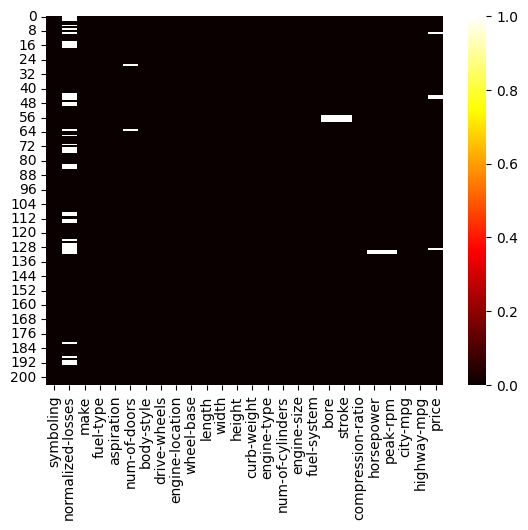

In [ ]:
sns.heatmap(df.isnull(), cmap = 'hot')

<li>We can clearly see there are missing values in some features.</li>
<li>Features with missing values:</li>
<ol>
<li>normalized-losses</li>
<li>num-of-doors</li>
<li>bore</li>
<li>stroke</li>
<li>horsepower</li>
<li>peak-rpm</li>
<li>price</li>
</ol>

## Handling missing values for these features

## 1) normalized-losses

### Hypothesis Testing For Test OF Normality Using Shapiro-Wilk Test
- <b>Useful hypothesis test of normality if the sample size is small (less than 50 or 100)</b>

In [ ]:
def normality_test(data):
  # Perform Shapiro-Wilk test
  statistic, p_value = shapiro(data)

  # Interpret the results
  alpha = 0.05  # significance level
  print("Shapiro-Wilk Test:")
  print("Statistic:", statistic)
  print("p-value:", p_value)

  if p_value > alpha:
      print("The data looks normally distributed (fail to reject H0)")
  else:
      print("The data does not look normally distributed (reject H0)")


### Test OF Normality Using Kolmogorov Spirnov Test

- <b>This test is more powerful and accurate when the sample size is larger probably greater than 100.</b>

In [ ]:
from scipy.stats import kstest, norm

def kolmogorov_test(data):
    # Perform Kolmogorov-Smirnov test
    statistic, p_value = kstest(data, 'norm')

    # Interpret the results
    alpha = 0.05  # significance level
    print("Kolmogorov-Smirnov Test:")
    print("Statistic:", statistic)
    print("p-value:", p_value)

    if p_value > alpha:
        print("The data looks normally distributed (fail to reject H0)")
    else:
        print("The data does not look normally distributed (reject H0)")



### Kernel Distribution Estimation Plot To Visually Inspect the distribution of the data for 'normalized-losses' column.

<Axes: xlabel='normalized-losses', ylabel='Density'>

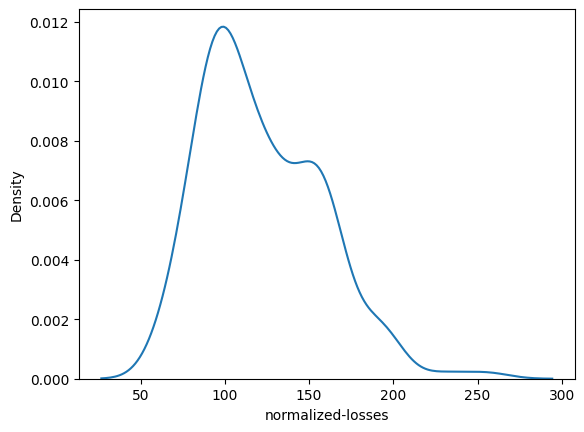

In [ ]:
sns.kdeplot(df['normalized-losses'])

### Performing Hypothesis Test Of Normality To Check whether the distribution for this feature is normal or not./


In [ ]:
normality_test(data = df['normalized-losses'].dropna())

Shapiro-Wilk Test:
Statistic: 0.9487634897232056
p-value: 1.1129301128676161e-05
The data does not look normally distributed (reject H0)


In [ ]:
kolmogorov_test(data = df['normalized-losses'].dropna())

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0
The data does not look normally distributed (reject H0)


<b><li>Since, normalized-losses is a continuous numerical features and it does not follow normal distribution with both shapiro test and kolmogrov test. Given sample size is 205 which is greater than 50, kolmogrov spirnov test provides more accurate results. So, the data is not normally distributed we can fill the missing values with its median not mean.</li></b>

### Filling missing values in 'normalized-losses' with median

In [ ]:
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace = True)

## 2) num-of-doors

In [ ]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

<b><li>Filling missing values of this feature with the mode value for num-of-doors feature since it contains numeric values.</li></b>
<b><li>Since, mode of this feature is equal to the median value and we need to convert the data types for calculating the median so replacing null values with the mode of this feautel

In [ ]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace = True)

## 3) bore

In [ ]:
df['bore'].value_counts()

bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.70     5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.80     2
3.63     2
3.50     2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.60     1
2.54     1
3.34     1
3.76     1
Name: count, dtype: int64

<Axes: xlabel='bore', ylabel='Density'>

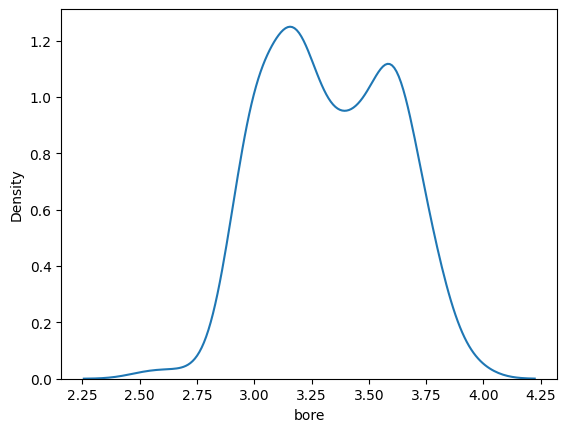

In [ ]:
sns.kdeplot(df['bore'])

In [ ]:
normality_test(data = df['bore'].dropna())

Shapiro-Wilk Test:
Statistic: 0.9641714096069336
p-value: 5.495250297826715e-05
The data does not look normally distributed (reject H0)


In [ ]:
kolmogorov_test(data = df['bore'].dropna())

Kolmogorov-Smirnov Test:
Statistic: 0.9944573765569173
p-value: 0.0
The data does not look normally distributed (reject H0)


<b><li>Since, bore is a continuous numerical features and it does not follow normal distribution with both shapiro test and kolmogorov test. Due to the fact that the sample size is 205 which is greater than 50, kolmogrov spirnov test provides more accurate results so we can say that the data is not normally distributed and we can fill the missing values with its median not mean.</li></b>

In [ ]:
df['bore'].fillna(round(df['bore'].median(), 2), inplace = True)

## 4) stroke

In [ ]:
df['stroke'].value_counts()

stroke
3.40    20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.50     6
3.27     6
3.41     6
3.11     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.90     3
2.90     3
3.08     2
2.19     2
2.68     2
3.10     2
4.17     2
2.80     2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='Density'>

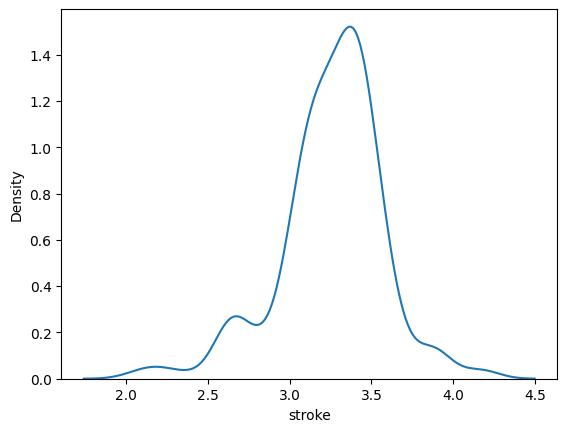

In [ ]:
sns.kdeplot(df['stroke'])

In [ ]:
normality_test(data = df['stroke'].dropna())

Shapiro-Wilk Test:
Statistic: 0.939202606678009
p-value: 1.8418695901800675e-07
The data does not look normally distributed (reject H0)


In [ ]:
kolmogorov_test(data = df['stroke'].dropna())

Kolmogorov-Smirnov Test:
Statistic: 0.9807738277724827
p-value: 0.0
The data does not look normally distributed (reject H0)


<b><li>Since, stroke is a continuous numerical features and it does not follows normal distribution with both shapiro test and kolmogorov test. Because sample size is 205 which is greater than 50, kolmogorov spirnov test is preferred in such scenarios. So, we can say that the data is not normally distributed and we can fill the missing values with its median not mean.</li></b>

In [ ]:
df['stroke'].fillna(round(df['stroke'].median(), 2), inplace = True)

## 5) horsepower

In [ ]:
df['horsepower'].value_counts()

horsepower
68.0     19
70.0     11
69.0     10
116.0     9
110.0     8
95.0      7
114.0     6
160.0     6
101.0     6
62.0      6
88.0      6
145.0     5
76.0      5
97.0      5
82.0      5
84.0      5
102.0     5
92.0      4
111.0     4
123.0     4
86.0      4
207.0     3
182.0     3
90.0      3
121.0     3
152.0     3
85.0      3
73.0      3
161.0     2
94.0      2
56.0      2
112.0     2
184.0     2
155.0     2
156.0     2
52.0      2
100.0     2
162.0     2
176.0     2
140.0     1
115.0     1
134.0     1
78.0      1
48.0      1
288.0     1
143.0     1
142.0     1
200.0     1
58.0      1
55.0      1
60.0      1
175.0     1
154.0     1
72.0      1
120.0     1
64.0      1
135.0     1
262.0     1
106.0     1
Name: count, dtype: int64

<Axes: xlabel='horsepower', ylabel='Density'>

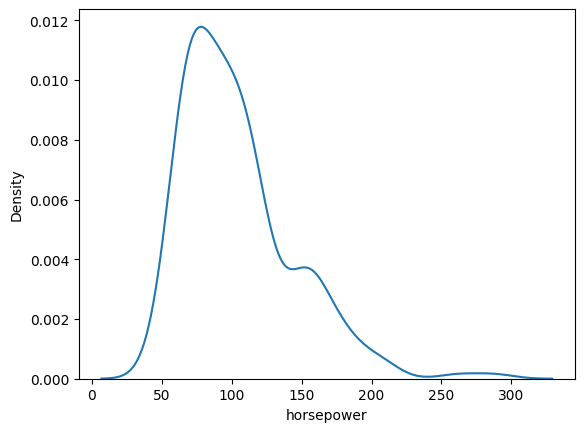

In [ ]:
sns.kdeplot(df['horsepower'])

In [ ]:
normality_test(data = df['horsepower'].dropna())

Shapiro-Wilk Test:
Statistic: 0.8846433162689209
p-value: 2.3242833005476804e-11
The data does not look normally distributed (reject H0)


In [ ]:
kolmogorov_test(data = df['horsepower'].dropna())

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0
The data does not look normally distributed (reject H0)


**<li>Since, horsepower is a continuous numerical feature with sample size greater than 50, kolmogorov spirnov test for normality is more accurate test for normality. Since, horsepower does not follow normal distribution, we can fill the missing values with median value.</li>**

In [ ]:
df['horsepower'].fillna(df['horsepower'].median(), inplace = True)

## 6) peak-rpm

In [ ]:
df['peak-rpm'].value_counts()

peak-rpm
5500.0    37
4800.0    36
5000.0    27
5200.0    23
5400.0    13
6000.0     9
5800.0     7
5250.0     7
4500.0     7
4150.0     5
4200.0     5
4350.0     4
4750.0     4
5100.0     3
5900.0     3
4250.0     3
4400.0     3
6600.0     2
4650.0     1
5600.0     1
5750.0     1
4900.0     1
5300.0     1
Name: count, dtype: int64

<Axes: xlabel='peak-rpm', ylabel='Density'>

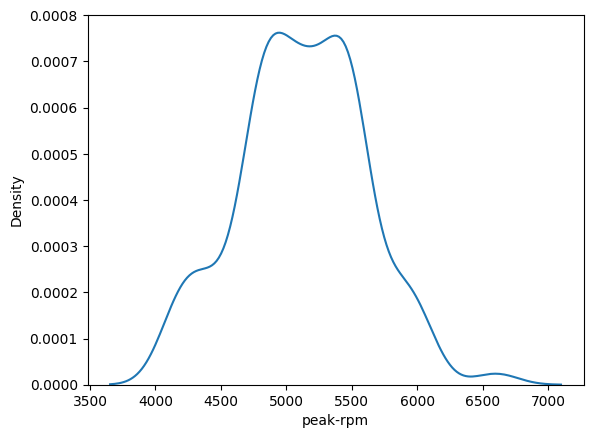

In [ ]:
sns.kdeplot(df['peak-rpm'])

In [ ]:
normality_test(data = df['peak-rpm'].dropna())

Shapiro-Wilk Test:
Statistic: 0.9700946807861328
p-value: 0.0002570408396422863
The data does not look normally distributed (reject H0)


In [ ]:
kolmogorov_test(data = df['peak-rpm'].dropna())

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0
The data does not look normally distributed (reject H0)


**<li>Since, peak-rpm is a continuous numerical feature with sample size greater than 50, kolmogorov spirnov test for normality is more accurate test for normality. Since, peak-rpm does not follow normal distribution, we can fill the missing values with median value.</li>**

In [ ]:
df['peak-rpm'].fillna(df['peak-rpm'].median(), inplace = True)

## 7) price

In [ ]:
df['price'].value_counts()

price
8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: count, Length: 186, dtype: int64

<Axes: xlabel='price', ylabel='Density'>

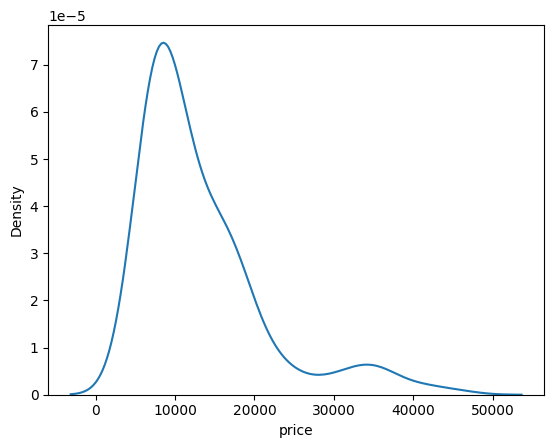

In [ ]:
sns.kdeplot(df['price'])

In [ ]:
normality_test(data = df['price'].dropna())

Shapiro-Wilk Test:
Statistic: 0.7985196709632874
p-value: 2.2160372427598544e-15
The data does not look normally distributed (reject H0)


In [ ]:
kolmogorov_test(data = df['price'].dropna())

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0
The data does not look normally distributed (reject H0)


**<li>Since, price is a continuous numerical feature with sample size greater than 50, kolmogorov spirnov test for normality is more accurate test for normality. Since, price does not follow normal distribution, we can fill the missing values with median value.</li>**


**<li>But let's inspect more on missing values to do a smart filling.</li>**

In [ ]:
df.loc[df['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,115.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,115.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,115.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


**<li>The three different car models/make seems to be missing and the prices seems to be different for each car models so filling the missing value with the overall median does not make much sense. Maybe filling with the median value as per car model would be a smart strategy to fill the missing values for price column as price for each car models can vary alot.</li>**

In [ ]:
df.loc[df['make'] == 'audi', 'price'] = df.loc[df['make'] == 'audi', 'price'].median()
df.loc[df['make'] == 'isuzu', 'price'] = df.loc[df['make'] == 'isuzu', 'price'].median()
df.loc[df['make'] == 'porsche', 'price'] = df.loc[df['make'] == 'porsche', 'price'].median()

In [ ]:
def univariate_piechart(df, col_name, explode = None, colors = None):
  sub_df =  df[col_name].value_counts().to_frame().reset_index()
  plt.figure(figsize = (12, 8))
  plt.pie(x = sub_df['count'], explode = explode,
          autopct = "%.2f%%", labels = sub_df[col_name],
          colors = colors)
  plt.legend()
  plt.show()



In [ ]:
def univariate_bargraph(df, col_name, colors = None):
  sub_df =  df[col_name].value_counts().to_frame().reset_index()
  print(sub_df)
  plt.figure(figsize = (12, 8))
  sns.barplot(data = sub_df, x = col_name, y = 'count',
              palette = colors)
  plt.legend()
  plt.show()

**1. - Is there a predominant fuel system type, and if so, what percentage of cars use it?**

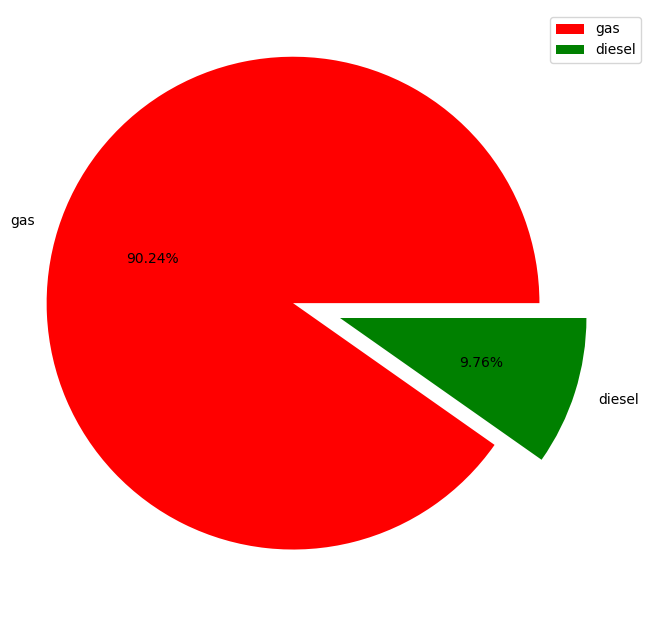

In [ ]:
univariate_piechart(df, 'fuel-type', explode = (0.2, 0),
                    colors = ["red", "green"])

**<li>Yes, the predominant fuel type is Gas and more than 90% of cars uses it.</li>**

**2. Is there a dominant engine type, and if yes, which one?**

<ipython-input-55-0373082c228a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sub_df, x = col_name, y = 'count',


  engine-type  count
0         ohc    148
1        ohcf     15
2        ohcv     13
3        dohc     12
4           l     12
5       rotor      4
6       dohcv      1


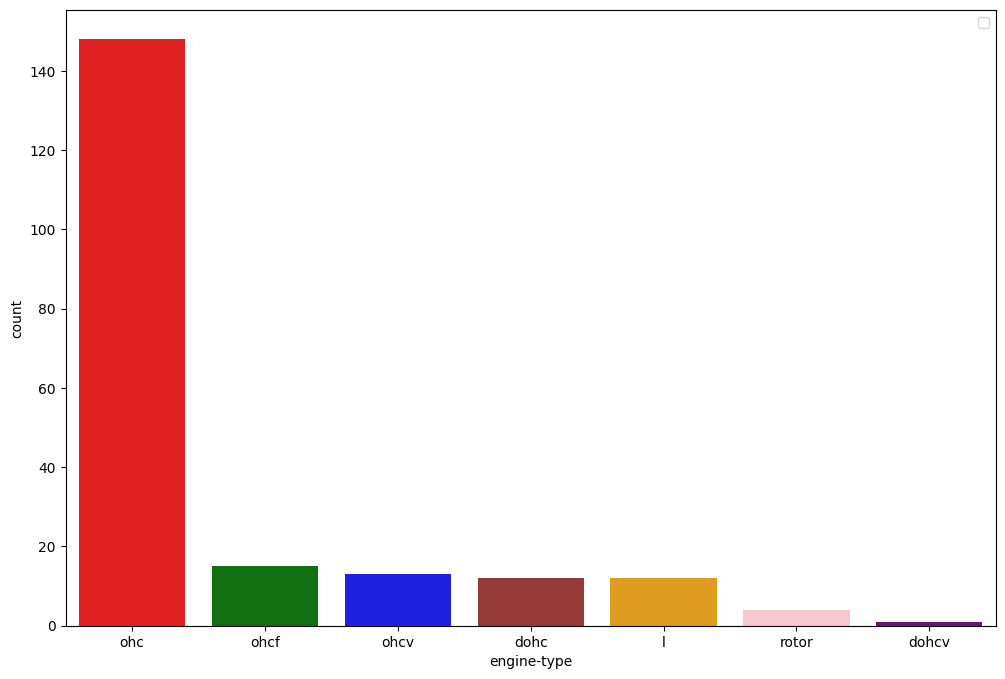

In [ ]:
univariate_bargraph(df, 'engine-type',
                    colors = ['red', 'green', 'blue',
                              'brown', 'orange', 'pink',
                              'purple'])

**<li>Yes, ohc is the most dominant engine type with more than 47% of car having them.</li>**

- <b>3. What are the most common body styles represented in the dataset? Are there any uncommon or rare body styles present?</b>

<ipython-input-55-0373082c228a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sub_df, x = col_name, y = 'count',


    body-style  count
0        sedan     96
1    hatchback     70
2        wagon     25
3      hardtop      8
4  convertible      6


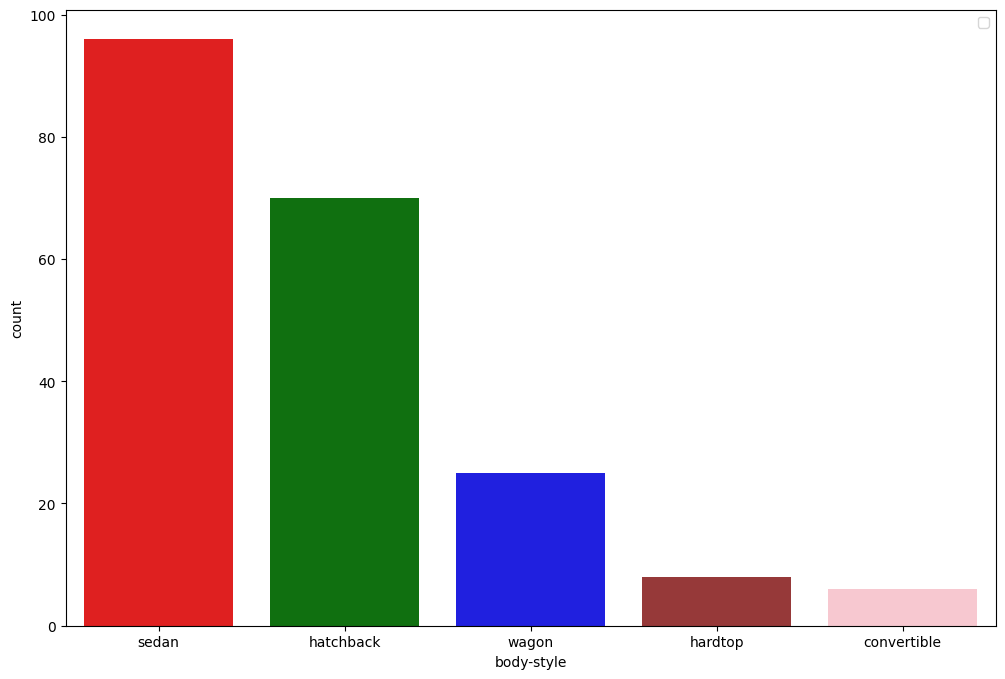

In [ ]:
univariate_bargraph(df, 'body-style',
                    colors = ['red', 'green', 'blue',
                              'brown', 'pink'])



- <b> From the given graph, we can see the most common body types seen in a car is 'Sedan' whereas the rare body part represented in the data is 'Convertible' and 'Hardtop'.</b>

<b><li>4. What are the predominant numbers of doors in the dataset?</li></b>

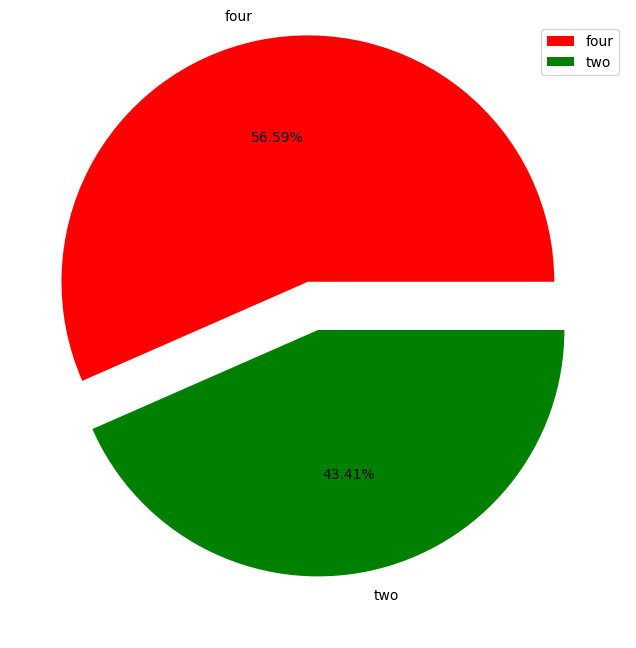

In [ ]:
univariate_piechart(df, 'num-of-doors', explode = (0.2, 0),
                    colors = ["red", "green"])


- <b>Approximately 56.5% of cars are equipped with four doors, while over 43.4% feature two doors.</b>

<b>5. Are there any dominant car manufacturers, and if so, which ones?</b>

In [ ]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

             make  count
0          toyota     32
1          nissan     18
2           mazda     17
3      mitsubishi     13
4           honda     13
5      volkswagen     12
6          subaru     12
7          peugot     11
8           volvo     11
9           dodge      9
10  mercedes-benz      8
11            bmw      8
12           audi      7
13       plymouth      7
14           saab      6
15        porsche      5
16          isuzu      4
17         jaguar      3
18      chevrolet      3
19    alfa-romero      3
20        renault      2
21        mercury      1


<ipython-input-66-54af2dd42d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = make_df, x = 'count', y = 'make',


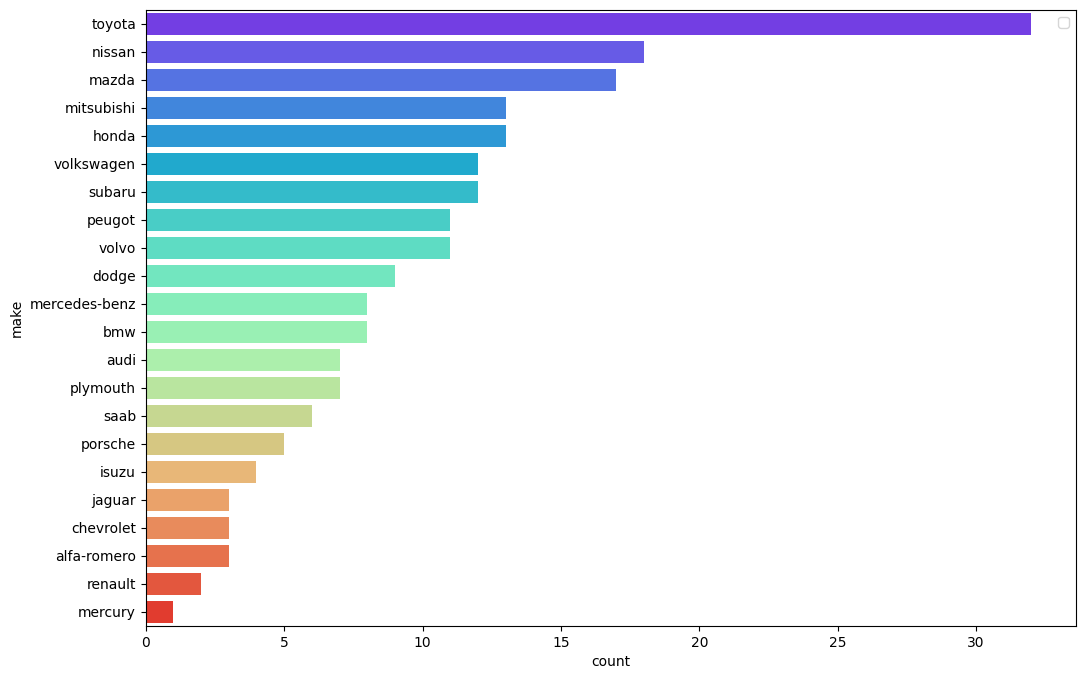

In [ ]:
make_df =  df['make'].value_counts().to_frame().reset_index()
print(make_df)
plt.figure(figsize = (12, 8))
sns.barplot(data = make_df, x = 'count', y = 'make',
            palette = 'rainbow'
            )
plt.legend()
plt.show()

<b><li>Toyota, Nissan and Mazda are top 3 dominant car manufactures in the dataset.</li></b>

<b><li>6. How does the distribution of fuel system types vary across different car makes?</li></b>

In [ ]:
fuel_make_df = df[['fuel-type', 'make']].value_counts().reset_index()
print(fuel_make_df.head())



  fuel-type        make  count
0       gas      toyota     29
1       gas      nissan     17
2       gas       mazda     15
3       gas  mitsubishi     13
4       gas       honda     13


In [ ]:
fuel_make_df

,fuel-type,make,count
0,gas,toyota,29
1,gas,nissan,17
2,gas,mazda,15
3,gas,mitsubishi,13
4,gas,honda,13
5,gas,subaru,12
6,gas,volvo,10
7,gas,dodge,9
8,gas,bmw,8
9,gas,volkswagen,8


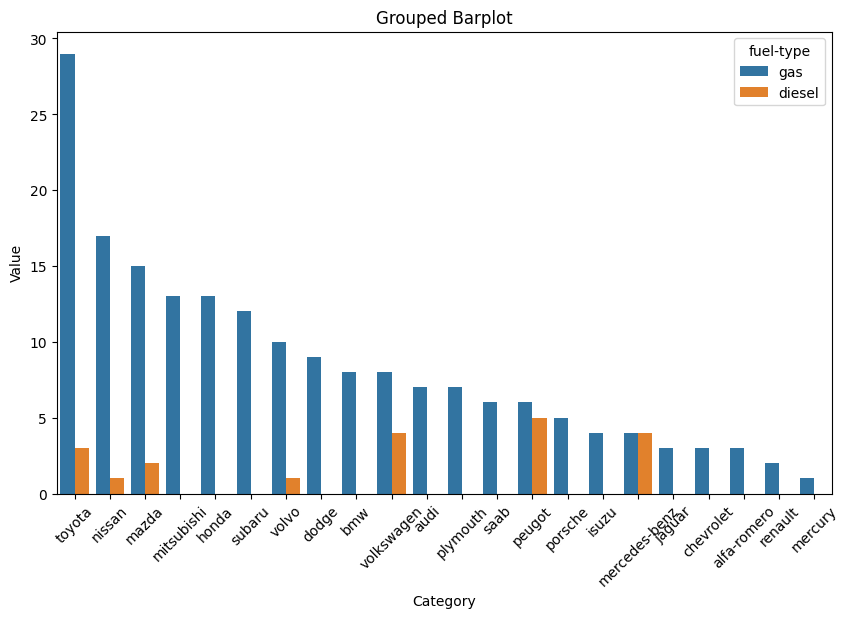

In [ ]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_make_df, x='make', y='count', hue = 'fuel-type')
plt.title('Grouped Barplot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation = 45)
plt.show()



<b><li>Most of the car models support gas fuel than diesel.</li></b>

<b><li>Mercedes Benz supports both gasoline and diesel fuels, ensuring an equal distribution of fuel options.</li></b>







<b><li>How do city-mpg and highway-mpg impact the pricing of cars, accounting for variables such as fuel efficiency and engine efficiency for fuel-efficient vehicles?</li></b>

<Axes: xlabel='city-mpg', ylabel='highway-mpg'>

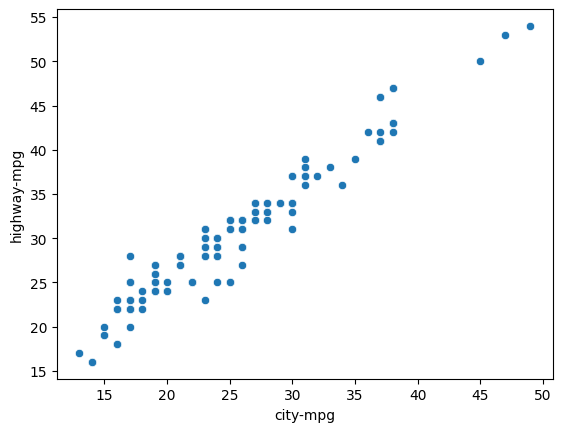

In [ ]:
sns.scatterplot(data = df, x = 'city-mpg', y = 'highway-mpg')

- **There is a linear relationship between city-mpg and highway-mpg.**

In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(df, x = 'city-mpg', y = "highway-mpg",
             z = "price", color = 'fuel-type')

<b><li>From this graph, we can say that the price for a car is higher for gas  than that of a fuel.</li></b>

## Relation Between City-mpg, highway-mpg, price and engine-type

In [ ]:
px.scatter_3d(df, x = 'city-mpg', y = "highway-mpg",
             z = "price", color = 'engine-type')